### <center>Text Mining</center>
- **Simple Analysis**: Word Clouds, Complexity, Dispersion Plots
- **Sentiment Analysis**: Deciding whether texts are positive or negative *(See the other File)*
- **Entity Analysis**: Identifying entities and properties of these entities
- **Topic Analysis**: Deciding what the major topics associated with a piece of text
- **Text Summarization**: Summarizing a document

#### Simple Analysis
-------- 

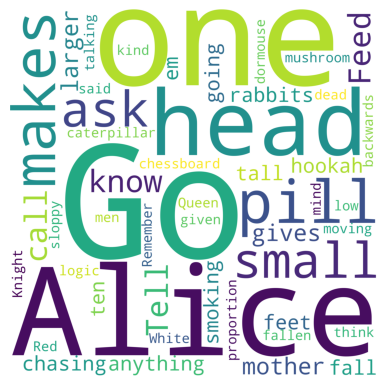

In [5]:
# Word Clouds

# import packages and data
# !pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
text = "One pill makes you larger, And one pill makes you small, And the ones that mother gives you, Don't do anything at all, Go ask Alice, When she's ten feet tall, And if you go chasing rabbits, And you know you're going to fall, Tell 'em a hookah-smoking caterpillar, Has given you the call, Call Alice, When she was just small, When the men on the chessboard, Get up and tell you where to go, And you've just had some kind of mushroom, And your mind is moving low, Go ask Alice, I think she'll know, When logic and proportion, Have fallen sloppy dead, And the White Knight is talking backwards, And the Red Queen's off with her head, Remember what the dormouse said, Feed your head, Feed your head"

# Setting up models
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', width = 3000, height = 3000).generate(text)

# plotting
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
# Complexity: 
# word length, sentence length, vocabulary (uniqueness)

# import packages
import nltk
#nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

# Construct tokens
sentences = nltk.Text(sent_tokenize(text))
words = nltk.Text(word_tokenize(text))

# build and feed the model
def get_complexity(text):
    num_chars=len(text)
    num_words=len(word_tokenize(text))
    num_sentences=len(sent_tokenize(text))
    vocab = {x.lower() for x in word_tokenize(text)}
    return len(vocab),int(num_chars/num_words),int(num_words/num_sentences),len(vocab)/num_words

get_complexity(text)

(86, 4, 160, 0.5375)

In [25]:
# Disperson Plots
# This show the relative frequency of words over the text
import nltk
#The following are some texts included in nltk
nltk.download('treebank')
nltk.download('webtext')
nltk.download('nps_chat')
nltk.download('inaugural')
nltk.download('genesis')
nltk.download('gutenberg')
from nltk.book import *
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package treebank to /Users/zoez/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package webtext to /Users/zoez/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package nps_chat to /Users/zoez/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package inaugural to /Users/zoez/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package genesis to /Users/zoez/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package gutenberg to /Users/zoez/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


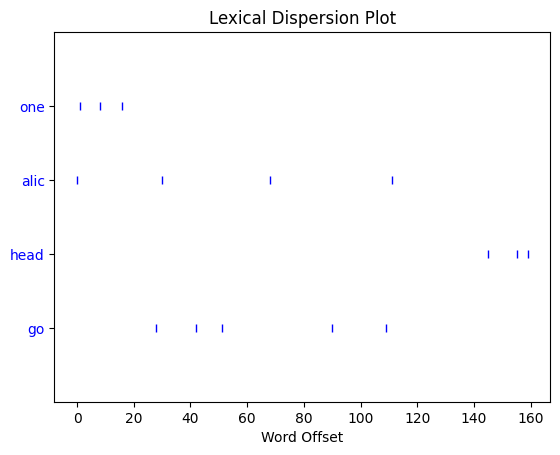

In [108]:
p_stemmer = PorterStemmer()
#text = inaugural.raw()
text = 'Alice One pill makes you larger, And one pill makes you small, And the ones that mother gives you, Dont do anything at all, Go ask Alice, When she is ten feet tall, And if you go chasing rabbits, And you know you are going to fall, Tell them a hookah-smoking caterpillar, Has given you the call, Call Alice, When she was just small, When the men on the chessboard, Get up and tell you where to go, And you have just had some kind of mushroom, And your mind is moving low, Go ask Alice, I think she will know, When logic and proportion, Have fallen sloppy dead, And the White Knight is talking backwards, And the Red Queen is off with her head, Remember what the dormouse said, Feed your head, Feed your head.'
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
sentences = sent_tokenize(striptext)
words = word_tokenize(striptext)
text = nltk.Text([p_stemmer.stem(i).lower() for i in words])
text.dispersion_plot(["one","alic","head","go"])

#### Sentiment Analysis
-----

In [177]:
# See the other file for pure sentiment analysis.
# The following is an overview of weighted sentiment analysis using vadar
# !pip install vaderSentiment

# model
def vader_comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    headers = ['pos','neg','neu','compound']
    print("Name\t",'  pos\t','neg\t','neu\t','compound')
    analyzer = SentimentIntensityAnalyzer()
    for i in range(len(texts)):
        name = texts[i][0]
        sentences = sent_tokenize(texts[i][1])
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        print('%-10s'%name,'%1.2f\t'%pos,'%1.2f\t'%neg,'%1.2f\t'%neu,'%1.2f\t'%compound)

# feed the model
texts = [["A","A is good, very good, the best restaurant ever","A is kind of good"],
         ["B","B has a very terrible taste","B is fundementally wrong"]]
vader_comparison(texts)

Name	   pos	 neg	 neu	 compound
A          0.64	 0.00	 0.36	 0.89	
B          0.00	 0.40	 0.60	 -0.53	


#### Entity Analysis
-----

In [193]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zoez/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [206]:
# entities are people, places, organizations.

# import nltk
def get_labeled_text(text,label_type='ALL'):
    en={}
    try:
        sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
        sentences = sent_detector.tokenize(text.strip())
        for sentence in sentences:
                tokenized = nltk.word_tokenize(sentence)
                tagged = nltk.pos_tag(tokenized)
                chunked = nltk.ne_chunk(tagged)
                for tree in chunked:
                    if hasattr(tree, 'label'):
                        if not label_type == "ALL":
                            if not tree.label() == label_type:
                                continue
                        ne = ' '.join(c[0] for c in tree.leaves())
                        en[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())]
    except Exception as e:
        return str(e)
    return en

text = """
I was walking along thinking of many things. For e.g., I walked with my friend Bilkees Bijou through the campus of Columbia University. I 
thought of birds, of bees, of sealing wax. I thought of cabbages and kings.
"""
get_labeled_text(text,'ORGANIZATION')

{'Columbia University': ['ORGANIZATION', 'NNP NNP']}